# Notebook to set up all the parameter/experiment/prior uncertainty yaml files

In [ ]:
import os
import cantera as ct
import yaml
import numpy as np
import pandas as pd

import simulation

import scipy.interpolate
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# where to save the yaml files
working_dir = '/home/moon/uncertainty_estimator/bpe/simulation/'

experimental_yaml_file = os.path.join(working_dir, 'experiment.yaml')
prior_yaml_file = os.path.join(working_dir, 'prior.yaml')

experimental_error = 0.05
MIN_EXP_ERROR = 1e-8

N_dist_pts = 20
DIST_START = 0.000
DIST_END = 0.010

dist_array = np.linspace(DIST_START, DIST_END, N_dist_pts)

# Load experimental data and save to yaml file

In [3]:
# Load the experimental data 
pt_data = '../../cpox_pt/horn_data/pt_profiles_smooth.csv'
df = pd.read_csv(pt_data)
distances = (df['Distance (mm)'] - 10.0) / 1000.0  # ignore the 10mm of no/catalyst space


exp_Ts = df['Temperature (K)']
f_T = scipy.interpolate.interp1d(distances, exp_Ts, fill_value='extrapolate')
Ts = f_T(dist_array)

species_headers = df.columns[2:]
experimental_data = {
    'Distance (m)': dist_array,
    'Temperature (K)': Ts
}

for header in species_headers:
    exp_values = df[header]
    f = scipy.interpolate.interp1d(distances, exp_values, fill_value='extrapolate')
    experimental_data[header] = f(dist_array)
    
for header in species_headers:
    uncertainty_header = 'Uncertainty ' + header
    experimental_data[uncertainty_header] = experimental_data[header] * experimental_error
    experimental_data[uncertainty_header][experimental_data[uncertainty_header] < MIN_EXP_ERROR] = MIN_EXP_ERROR

# Convert from numpy arrays into lists
for key in experimental_data.keys():
    experimental_data[key] = experimental_data[key].tolist()

with open(experimental_yaml_file, 'w') as outfile:
    yaml.dump(experimental_data, outfile, default_flow_style=False)
# with open(experimental_yaml_file) as f:
#     data = yaml.safe_load(f)

In [15]:
experimental_data.keys()

dict_keys(['Distance (m)', 'Temperature (K)', 'O2 (mol/min)', 'CH4 (mol/min)', 'H2 (mol/min)', 'CO (mol/min)', 'CO2 (mol/min)', 'H2O (mol/min)', 'Uncertainty O2 (mol/min)', 'Uncertainty CH4 (mol/min)', 'Uncertainty H2 (mol/min)', 'Uncertainty CO (mol/min)', 'Uncertainty CO2 (mol/min)', 'Uncertainty H2O (mol/min)'])

In [23]:
experimental_data

{'Distance (m)': [0.0,
  0.0005263157894736842,
  0.0010526315789473684,
  0.0015789473684210526,
  0.002105263157894737,
  0.002631578947368421,
  0.003157894736842105,
  0.0036842105263157894,
  0.004210526315789474,
  0.004736842105263157,
  0.005263157894736842,
  0.005789473684210527,
  0.00631578947368421,
  0.006842105263157894,
  0.007368421052631579,
  0.007894736842105263,
  0.008421052631578947,
  0.008947368421052631,
  0.009473684210526315,
  0.01],
 'Temperature (K)': [700.3545469053429,
  856.8074963649676,
  1010.6221086488123,
  1118.829875772826,
  1184.706577228421,
  1222.159351229661,
  1244.1822957483744,
  1254.040236124884,
  1255.2411679885804,
  1252.03707656915,
  1247.7318591943676,
  1242.8010064826397,
  1234.7822307584001,
  1223.9140457326462,
  1216.2150709295809,
  1205.8023872998997,
  1198.1701209575724,
  1190.4893388649032,
  1187.867812754127,
  1183.2247881679966],
 'O2 (mol/min)': [0.030645586858493206,
  0.026372648797987237,
  0.01596084797845

# Plot the experimental samples and uncertainty

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Source Code Pro' (SourceCodePro-SemiboldIt.ttf) italic normal 600 normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-B.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Source Code Pro' (SourceCodePro-BoldIt.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Source Code Pro' (SourceCodePro-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-BI.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Source Code Pro' (SourceCodePro-It.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Source Code Pro' (SourceCodePro-BlackIt.ttf) italic normal 900 normal>) 

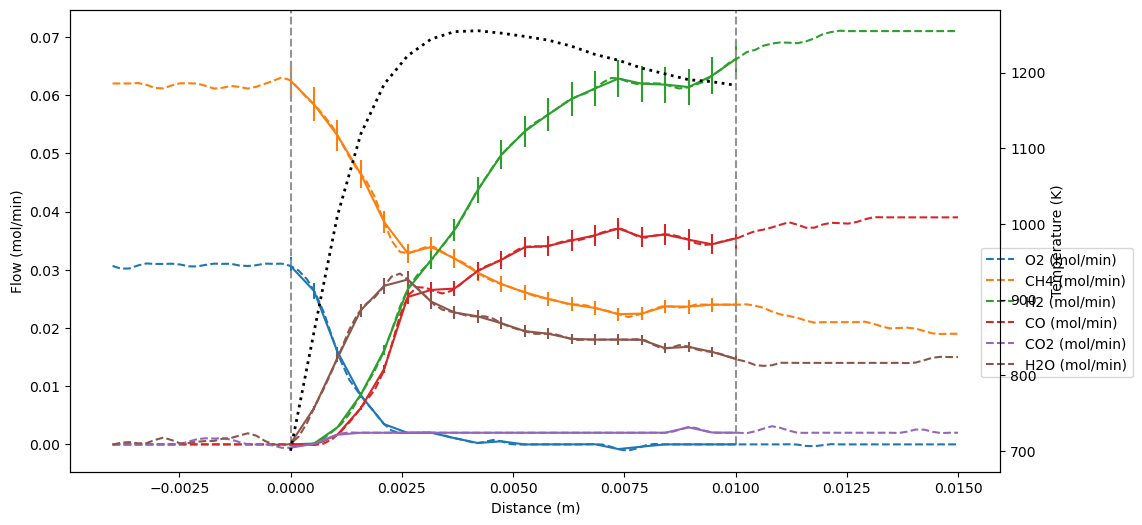

In [6]:
# Plot the result
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
linewidth1 = 2.0
linewidth2 = 2.0

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)


for i, header in enumerate(species_headers):
    plt.plot((df['Distance (mm)'].values - 10.0) / 1000.0, df[header].values, linestyle='dashed', label=header, color=colors[i])

    plt.errorbar(dist_array, experimental_data[header], experimental_data['Uncertainty ' + header], color=colors[i])

ax1 = plt.gca()
ylim = ax1.get_ylim()
# Mark the catalyst extent
plt.plot([0.0, 0.0], [0, 1.0], linestyle='--', color='xkcd:grey')
plt.plot([0.01, 0.01], [0, 1.0], linestyle='--', color='xkcd:grey')
plt.ylim(ylim)

ax2 = ax1.twinx()
ax2.plot(dist_array, Ts, label='Temperature', color='k', linestyle=':', linewidth=linewidth2)
ax2.set_ylabel('Temperature (K)')
ax2.yaxis.get_major_formatter().set_useOffset(False)
# ax2.set_ylim((832.6458681304853, 1380.7048767073081))

ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Flow (mol/min)')
ax1.legend(bbox_to_anchor=(1.15, 0.5))
# ax1.set_ylim((-0.005686988947011412, 0.1))
# ax1.set_xlim((-0.0004950495049504951, 0.010396039603960397))


# plt.axvline(x=dist_array[13], color='k')  # trick for finding place on x axis
# print(dist_array[13])

# Make yaml to define which input parameters are getting perturbed

In [7]:
mech_yaml = '/home/moon/uncertainty_estimator/cpox_pt/cpox_pt_20251229/cantera/chem_annotated.yaml'
mech_yaml = '/home/moon/uncertainty_estimator/cpox_pt/cpox_pt_20251229/cantera/chem_annotated_noCH4X.yaml'
gas = ct.Solution(mech_yaml)
surf = ct.Interface(mech_yaml, "surface1", [gas])

/home/moon/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: StickingRate::validate: 
 Sticking coefficient is greater than 1 for reaction 'CH4(2) + 2 X(1) <=> CH3X(27) + HX(21)'
 at T = 5000.0

 Sticking coefficient is greater than 1 for reaction 'CH4(2) + 2 X(1) <=> CH3X(27) + HX(21)'
 at T = 10000.0

  after removing the cwd from sys.path.


In [8]:
def get_i_thing(ref_composition, phase):
    for i in range(phase.n_species):
        if phase.species()[i].composition == ref_composition:
            return i
    assert False
    return -1

# Get indices of key species
i_Ar = get_i_thing({'Ar': 1.0}, gas)
i_CH4 = get_i_thing({'C': 1.0, 'H': 4.0}, gas)
i_O2 = get_i_thing({'O': 2.0}, gas)
i_CO2 = get_i_thing({'C': 1.0, 'O': 2.0}, gas)
i_H2O = get_i_thing({'H': 2.0, 'O': 1.0}, gas)
i_H2 = get_i_thing({'H': 2.0}, gas)
i_CO = get_i_thing({'C': 1.0, 'O': 1.0}, gas)
i_C2H4 = get_i_thing({'C': 2.0, 'H': 4.0}, gas)
i_X = get_i_thing({'X': 1.0}, surf)
i_OX = get_i_thing({'X': 1.0, 'O': 1.0}, surf)
i_CX = get_i_thing({'X': 1.0, 'C': 1.0}, surf)
i_CO2X = get_i_thing({'X': 1.0, 'C': 1.0, 'O': 2.0}, surf)
i_COX = get_i_thing({'X': 1.0, 'C': 1.0, 'O': 1.0}, surf)
i_HX = get_i_thing({'X': 1.0, 'H': 1.0}, surf)
i_CH3X = get_i_thing({'X': 1.0, 'H': 3.0, 'C': 1.0}, surf)
i_H2OX = get_i_thing({'X': 1.0, 'H': 2.0, 'O': 1.0}, surf)
i_H2X = get_i_thing({'X': 1.0, 'H': 2.0}, surf)

# TODO import actual BEEF matrix

In [30]:
my_species_indices = [i_OX, i_COX, i_HX, i_CH3X, i_CX]

eV_to_j_mol = 96485

std_dev = 0.3 * eV_to_j_mol


prior_cov_J_mol = np.identity(len(my_species_indices)) * np.float_power(std_dev, 2.0)  # but this should be squared
prior_data = {}
for i in my_species_indices:
    key = surf.species_names[i]
    prior_data[key] = 0.0

# flatten prior covariance matrix into list of lists
    
prior_data['cov_J2_mol2'] = prior_cov_J_mol.tolist()

prior_data['species_indices'] = my_species_indices
prior_data['species_names'] = [surf.species_names[i] for i in my_species_indices]

In [31]:
prior_data

{'OX(25)': 0.0,
 'COX(23)': 0.0,
 'HX(21)': 0.0,
 'CH3X(27)': 0.0,
 'CX(29)': 0.0,
 'cov_J2_mol2': [[837841970.25, 0.0, 0.0, 0.0, 0.0],
  [0.0, 837841970.25, 0.0, 0.0, 0.0],
  [0.0, 0.0, 837841970.25, 0.0, 0.0],
  [0.0, 0.0, 0.0, 837841970.25, 0.0],
  [0.0, 0.0, 0.0, 0.0, 837841970.25]],
 'species_indices': [5, 3, 1, 7, 9],
 'species_names': ['OX(25)', 'COX(23)', 'HX(21)', 'CH3X(27)', 'CX(29)']}

In [32]:
with open(prior_yaml_file, 'w') as outfile:
    yaml.dump(prior_data, outfile, default_flow_style=False)
# with open(prior_yaml_file) as f:
#     data = yaml.safe_load(f)

In [12]:
# Make hardcoded list of parameter indices to copy into your simulation_wrapper (maybe this can be a global later...)
my_species_indices



[5, 3, 1, 7, 9]

In [29]:
[surf.species_names[i] for i in my_species_indices]

['OX(25)', 'COX(23)', 'HX(21)', 'CH3X(27)', 'CX(29)']

In [13]:
# Make hardcoded list of distance indices to copy into your simulation_wrapper (maybe this can be a global later...)
sim_dist_indices = []
for i in range(len(dist_array)):
    sim_dist_indices.append(int(np.argmin(np.abs(simulation.dist_array - dist_array[i]))))
print(sim_dist_indices)

[211, 238, 266, 294, 321, 349, 377, 404, 432, 460, 488, 515, 543, 571, 598, 626, 654, 681, 709, 737]


In [ ]:
simulation.dist_array[105]

In [ ]:
simulation.dist_array[119]

In [ ]:
dist_array[1]

In [16]:
with open(mech_yaml) as f:
    data = yaml.safe_load(f)

In [20]:
species_names = [x['name'] for x in data['species']]
species_compositions = [x['composition'] for x in data['species']]

In [28]:
A = [x for x in range(10)]
B = [A, A, A]
print(B)
np.vstack(B)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]


array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])